In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

**Unsupervised Learning and PCA**

In machine learning, as we've learned previously, unsupervised learning is a category of algorithms used to discover patterns and relationships within data without explicitly labeled outcomes (targets). Unlike supervised learning, where the algorithm learns from labeled data to predict outcomes, unsupervised learning deals with raw, unlabeled data and aims to extract meaningful insights or representations from it.

Previously, we learned about KMeans, which is a form of unsupervised learning that's used for finding clusters withing your data.

Principal Component Analysis (PCA) is another technique in unsupervised learning, but where the application is *dimensionality reduction* in data. We talke alot earlier about the importance of not having too many features in our data, since that could lead to the curse of dimensionality. In our previous labs, we actually worked alot with dimensionality reduction by iteratively removing features and re-training our models, in order to try to keep as few features as possible.

PCA can automatically reduce dimensions in our data. It identifies the directions of maximum variance in high-dimensional data and projects it onto a lower-dimensional subspace while preserving the essential structure of the data. By reducing the number of features or dimensions, PCA can help in simplifying the data and improving computational efficiency while retaining most of the information.


**Objective**

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning and data analysis. Its primary goal is to simplify the complexity of high-dimensional data by transforming it into a lower-dimensional space while retaining most of the relevant information. PCA achieves this by identifying the directions (or principal components) that capture the maximum variance in the data.

In this context, we're once again working with the Iris dataset, a popular dataset in machine learning. It consists of measurements of various features of iris flowers, such as sepal length, sepal width, petal length, and petal width. Our goal is to visualize the data and apply PCA to reduce its dimensionality while preserving its underlying structure.

*Note*: PCA is usually used on datasets with many dimensions(features) in order to reduce that amount of features into something much lower, but we choose to apply it on the iris dataset here so that we clearly can see what's going on.

---

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

iris_df = pd.read_csv('../data/IRIS.csv')

iris_df.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
# note, the iris dataset has 4 features and 1 target, but just for simplicity and visualization purposes, we'll drop one of the features instantly

iris_df = iris_df[['sepal_length', 'petal_length', 'petal_width', 'species']]

iris_df.head()

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,Iris-setosa
1,4.9,1.4,0.2,Iris-setosa
2,4.7,1.3,0.2,Iris-setosa
3,4.6,1.5,0.2,Iris-setosa
4,5.0,1.4,0.2,Iris-setosa


Split the features from the targets

In [29]:
X, y = iris_df[['sepal_length', 'petal_length', 'petal_width']], iris_df['species']

Plot the 3 features, and the target as the color

In [31]:
iris_df

import plotly.express as px

df = px.data.iris()
fig = px.scatter_3d(iris_df, x='sepal_length', y='petal_length', z='petal_width', color='species')
fig.show()

Now we perform PCA on the **features** here, to find the 2 principle components (most important directions)

In [32]:
# Perform PCA on the features
# Note, we DONT use the targets here

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

iris_reduced_df = pd.DataFrame(X_pca)

iris_reduced_df

,0,1
0,-2.656097,-0.240044
1,-2.728993,-0.055838
2,-2.887767,0.100825
3,-2.752460,0.248016
4,-2.692545,-0.147941
...,...,...
145,1.946595,-0.088737
146,1.485011,0.114438
147,1.765671,0.012857
148,1.936108,0.426867


In [34]:
# Let's also add the targets from earlier to our newly reduced data, in order to be able to plot
iris_reduced_df['species'] = y

iris_reduced_df

,0,1,species
0,-2.656097,-0.240044,Iris-setosa
1,-2.728993,-0.055838,Iris-setosa
2,-2.887767,0.100825,Iris-setosa
3,-2.752460,0.248016,Iris-setosa
4,-2.692545,-0.147941,Iris-setosa
...,...,...,...
145,1.946595,-0.088737,Iris-virginica
146,1.485011,0.114438,Iris-virginica
147,1.765671,0.012857,Iris-virginica
148,1.936108,0.426867,Iris-virginica


As you can see, the dimensionality of our features have decreased from 3 to 2. 

**But**, which features are they?!

In [36]:
# Plot the results with colors representing different classes
fig = px.scatter(iris_reduced_df, x=0, y=1, color='species', title='PCA of Iris Dataset (2D)')
fig.update_xaxes(title_text='Prinpical Component 1')
fig.update_yaxes(title_text='Prinpical Component 2')
fig.show()

As you can see, we've reduced the feature dimensions from 3 to 2. PCA has mathematicall identified the 2 axis which account for the most variance in our original data, thus preserving as much information as possible.

However, we have lost *some* information!

**Importantly**, the 2 principle component axis we found are neither our original sepal_length, sepal_width or petal_width! Rather, it's a combination of all of them, mathematically found in a way that keeps as much information of the inherent structure of the data as possible!

A downside of PCA is thus that it makes our newly found features *less* interpretable since we can't immediatly say what they actually mean.

---

We are free to choose the amount of principle components we'd like to use. Let's repreat the experiment above, but this time only keep the single most important dimension in the data.

In [37]:
X

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [38]:
# Reduce the feature space into a single

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

iris_further_reduced_df = pd.DataFrame(X_pca)

iris_further_reduced_df

,0
0,-2.656097
1,-2.728993
2,-2.887767
3,-2.752460
4,-2.692545
...,...
145,1.946595
146,1.485011
147,1.765671
148,1.936108


In [39]:
iris_further_reduced_df['species'] = y

iris_further_reduced_df

,0,species
0,-2.656097,Iris-setosa
1,-2.728993,Iris-setosa
2,-2.887767,Iris-setosa
3,-2.752460,Iris-setosa
4,-2.692545,Iris-setosa
...,...,...
145,1.946595,Iris-virginica
146,1.485011,Iris-virginica
147,1.765671,Iris-virginica
148,1.936108,Iris-virginica


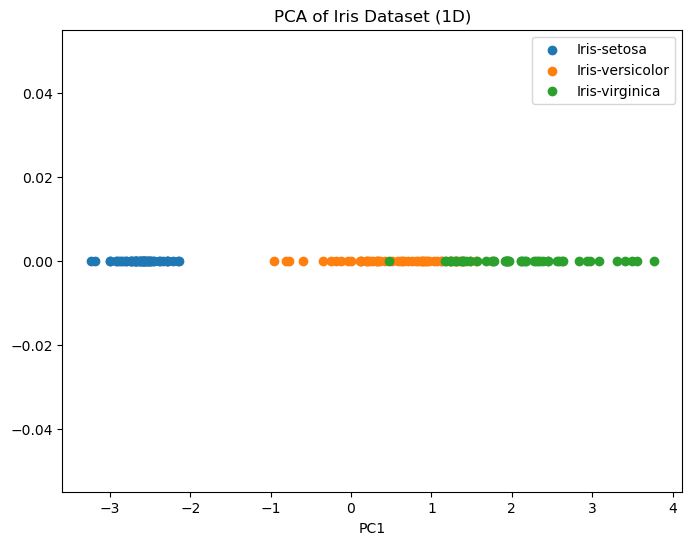

In [40]:
plt.figure(figsize=(8, 6))
for species in iris_reduced_df['species'].unique():
    plt.scatter(iris_reduced_df[iris_reduced_df['species'] == species][0], 
                [0] * len(iris_reduced_df[iris_reduced_df['species'] == species][0]), 
                label=species)

plt.xlabel('PC1')
plt.title('PCA of Iris Dataset (1D)')
plt.legend()

plt.show()

We have now reduced our feature space into the single most important dimension in terms of the amount of varience of data. We have indeed lost information on the way, though - which is natural to do just as when you manually drop features during feature engineering.

However, sometimes, as mentioned many times before, it is important to reduce the dimensionality of your feature space. Especially if you have *alot* of features.

---

**In conclusion**, PCA is a great way to reduce dimensions of your data. However, if your stated goal is to also be able to *interpret* the inner workings of your data - then PCA is actually very bad since the dimensions it identifies can be any arbitrary combinations of your original features, making it impossible to understand what the model you'll train later on these new dimensions actually will base their predictions on.

**As a second point**, PCA is another one of those algorithms which are very sensitive to different scales of your features. Therefore, make sure to scale your features before you apply PCA - if you have large differences of scale in your features.

---

## Challenges

Let's use PCA in practice for a slightly larger dataset. We'll use the student performance dataset we worked with last week.

*Note* We'll not focus on EDA or any rigurous evaluation here. Rather, the task is just to showcase how PCA can be applied.

**Task 1**

Import the dataset, drop G1 & G2 and one-hot-encode categorical variables

In [41]:
student_df = pd.read_csv("../lab/student-por.csv", delimiter=";")

student_df.drop(columns=["G2", "G1"], inplace=True)

X, y = student_df.drop(columns=['G3']), student_df['G3']

X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


As mentioned, we're just going to do a very quick and dirty preperation of our data (super sloppy, not reccommended)

In [42]:
# Get only the string/categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode the categorical columns
X = pd.get_dummies(X, columns=categorical_columns, dtype=int)

X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                649 non-null    int64
 1   Medu               649 non-null    int64
 2   Fedu               649 non-null    int64
 3   traveltime         649 non-null    int64
 4   studytime          649 non-null    int64
 5   failures           649 non-null    int64
 6   famrel             649 non-null    int64
 7   freetime           649 non-null    int64
 8   goout              649 non-null    int64
 9   Dalc               649 non-null    int64
 10  Walc               649 non-null    int64
 11  health             649 non-null    int64
 12  absences           649 non-null    int64
 13  school_GP          649 non-null    int32
 14  school_MS          649 non-null    int32
 15  sex_F              649 non-null    int32
 16  sex_M              649 non-null    int32
 17  address_R       

All features are approximately at the same scale also (except for maybe age, but the difference isn't that significant) so we'll omit feature scaling now aswell

**Task 2**

GridSearch a RandomForest to find a good performing set of hyperparameters on this dataset

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error

In [45]:
param_grid = {
                "n_estimators": [10, 20, 50, 100], 
                "max_depth": [10, 20, 30],  
                "min_samples_split": [2, 5, 10],
                "min_samples_leaf": [1, 2, 4]
             }

rf_classifier = RandomForestRegressor(random_state=42)

score = make_scorer(mean_absolute_error, greater_is_better=False)

grid_search = GridSearchCV(
    estimator=rf_classifier, 
    param_grid=param_grid,
    cv=3, 
    n_jobs=-1, 
    verbose=2,  
    scoring=score,
)

# Utför grid search över alla möjliga kombinationer av dina hyperparameters
grid_search.fit(X, y)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50, 100]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=2)

In [46]:
grid_search.best_score_ * -1

2.112873859773003

**Task 3**

Ok, now let's try to reduce our feature space dimension by applying PCA

In [47]:
# as we can see, we have 56 features atm

X.shape

(649, 56)

Assume we want to reduce to, say 50 dimensions

In [48]:
number_of_principal_components = 50

pca = PCA(n_components=number_of_principal_components)
X_pca = pca.fit_transform(X)

In [49]:
X_reduced = pd.DataFrame(X_pca)

X_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.329104,-1.059743,-1.214452,0.783245,1.869924,-0.484777,0.345771,-0.055875,-1.546178,-0.587887,...,-7.808492e-16,5.046007e-16,-4.540464e-16,-8.558210e-16,-1.856962e-15,3.951081e-16,-1.694181e-15,-7.935979e-16,-2.263943e-15,2.265116e-15
1,-1.747627,-1.182683,1.768597,-0.492519,0.031529,-0.918856,-0.529808,-0.921067,0.600302,-0.272148,...,5.861763e-16,-3.195915e-15,3.027665e-15,-2.373323e-16,-9.941331e-16,-1.580790e-15,-5.087328e-16,1.781006e-15,-2.543923e-15,-1.199034e-15
2,2.265847,-0.569132,1.203373,-0.326002,-2.470363,0.605920,-0.324319,-0.450481,1.453868,-0.365693,...,-1.523041e-15,4.641915e-16,-5.865735e-16,5.112356e-16,-4.499185e-16,7.556402e-16,-3.951296e-16,4.668553e-16,1.114678e-15,-1.437943e-15
3,-3.828541,-1.770057,-1.883603,-1.495695,-0.553642,0.801781,1.331744,-0.557694,0.787251,0.489337,...,-2.228876e-15,-7.288019e-16,1.841194e-15,1.178878e-15,-5.825104e-16,-4.697994e-16,-1.684024e-16,-3.344554e-16,2.219976e-16,-1.927031e-15
4,-3.749547,-0.612566,-1.270040,-1.572576,-0.288569,0.542318,0.251703,-0.115157,0.076500,-0.210128,...,-9.714381e-16,4.288152e-16,1.122994e-15,5.813649e-17,2.041409e-16,-1.009831e-15,-2.567901e-16,-8.929953e-16,-2.537549e-16,-5.488408e-16


Note that we now only have 50 dimensions in our feature space. 

That's great, but at the same time we've lost all common sense of what these columns actually represent!

All we know is that they represent the 50 directions in which we have the most variance, in our feature space.

In [50]:
# let's do the same gridsearch as above, but using these 50 principle components as our new features

param_grid = {
                "n_estimators": [10, 20, 50, 100], 
                "max_depth": [10, 20, 30],  
                "min_samples_split": [2, 5, 10],
                "min_samples_leaf": [1, 2, 4, 6]
             }

rf_classifier = RandomForestRegressor()

score = make_scorer(mean_absolute_error, greater_is_better=False)

grid_search = GridSearchCV(
    estimator=rf_classifier, 
    param_grid=param_grid,
    cv=3, 
    n_jobs=-1, 
    verbose=2,  
    scoring=score,
)

# Note that we train on X_reduced here!!
grid_search.fit(X_reduced, y)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50, 100]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=2)

First, notice that it takes significantly longer to train here because the Tree's have many more questions to ask! Why is this?

Look at the features again, they have continous values now instead of discrete - making the number of possible questions expontantially more.

Have this training time increase in consideration, especially when training trees. Other families of models don't have the same problem.

In [51]:
grid_search.best_score_ * -1

2.156960698719286

We got comparable results as above.

**Task 5**

In [52]:
grid_best_score = []

Now do a foor-loop, where-in you each time reduce your original number of principle components (dimensionality of the feature space) to

50, 45, 40, 35, 30, 25, 15, 5, 2

Do a gridsearch for each of those case.

For each iteration of the loop, append the best score to grid_best_score list defined above  

In [53]:
param_grid = {
                "n_estimators": [10, 20, 50, 100], 
                "max_depth": [10, 20, 30],  
                "min_samples_split": [2, 5, 10],
                "min_samples_leaf": [1, 2, 4, 6]
             }

rf_classifier = RandomForestRegressor()

score = make_scorer(mean_absolute_error, greater_is_better=False)

grid_search = GridSearchCV(
        estimator=rf_classifier, 
        param_grid=param_grid,
        cv=3, 
        n_jobs=-1, 
        verbose=2,  
        scoring=score,
    )

In [54]:
principal_components = [50, 45, 35, 30, 20, 15, 5, 2, 1]

for number_of_principal_components in principal_components:

    # reduce the original feature space
    
    pca = PCA(n_components=number_of_principal_components)
    X_pca = pca.fit_transform(X)

    X_reduced = pd.DataFrame(X_pca)

    # conduct a gridsearch on X_reduced as features

    grid_search.fit(X_reduced, y)

    grid_best_score.append(grid_search.best_score_*-1)    

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Fitting 3 folds for each of 144 candidates, totalling 432 fits


**Task 6**

Plot the list grid_best_score (y-axis) against the number of principle components (x-axis) so that you can compare the results for the grid searches above.

Does the resulting plot look similar to what you find during previous week's lab?

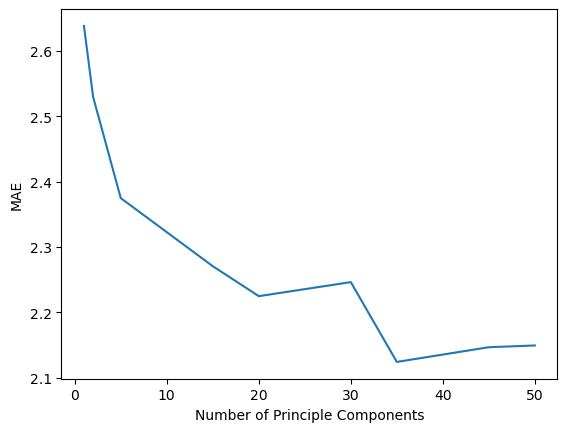

In [56]:
plt.plot(principal_components, grid_best_score)
plt.xlabel('Number of Principle Components')
plt.ylabel('MAE')
plt.show()